In [5]:
import random
from matplotlib import pyplot as plt
import numpy as np
plt.style.use("seaborn-v0_8") # beautiful!


# 定義三種策略：總是不換；總是換門；總是丟個銅板決定要不要換。
from enum import Enum
Strategy = Enum("Strategy", ["ALWAYS_KEEP", "ALWAYS_SWAP", "RANDOM_CHOICE"])

In [6]:
def monty_hall(strategy):
    # 先定義門後面有啥。
    behind_doors = ["CAR", "GOAT", "GOAT"]
    
    # 隨機選一扇門，並拿到門後面的東西。
    grab_one = random.choice(behind_doors)
    
    # 主持人把另一扇門打開。
    behind_doors.pop(behind_doors.index(grab_one))
    behind_doors.pop(behind_doors.index("GOAT"))
    
    # 這時候根據你的策略決定要不要換。    
    if strategy == Strategy.ALWAYS_KEEP:
        pass
    
    elif strategy == Strategy.ALWAYS_SWAP:
        grab_one, behind_doors[0] = behind_doors[0], grab_one
        
    elif strategy == Strategy.RANDOM_CHOICE:
        if random.choice(["SWAP", "NOSWAP"]) == "SWAP":
            grab_one, behind_doors[0] = behind_doors[0], grab_one
    
    # 回傳最後拿到的。
    return grab_one

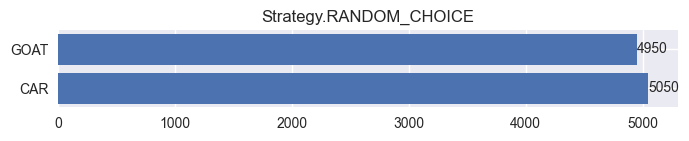

In [14]:
# 我們將進行實驗 10000 次。
N = 10000

strategy = Strategy.RANDOM_CHOICE
results = [monty_hall(strategy) for _ in range(N)]

# 把結果繪製出來
plt.figure(figsize=(8, 1))
plt.barh(*np.unique(results, return_counts=True))
ax = plt.gca()
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title(strategy)
plt.show()